VGGNet19

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential

In [ ]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):
    
    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"
    
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    #print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    #print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    #print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    #print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    #print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))
        
    #print(Output_train)            
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train) 
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/Users/vds/Documents/Group_1"


#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)



In [ ]:
trainInp.shape

(250, 224, 224, 3)

In [ ]:
trainOut.shape

(250,)

In [ ]:
type(trainInp)

In [ ]:
trainInp=trainInp.reshape()
testInp=tf.convert_to_tensor(testInp, dtype=tf.float32)
valInp=tf.convert_to_tensor(valInp, dtype=tf.float32)
trainOut=tf.convert_to_tensor(trainOut, dtype=tf.float32)
valOut=tf.convert_to_tensor(valOut, dtype=tf.float32)
testOut=tf.convert_to_tensor(testOut, dtype=tf.float32)

In [ ]:
y_tensor = tf.convert_to_tensor(y, dtype=tf.int64)

In [ ]:
trainInp=tf.convert_to_tensor(trainInp, dtype=tf.float32)
testInp=tf.convert_to_tensor(testInp, dtype=tf.float32)
valInp=tf.convert_to_tensor(valInp, dtype=tf.float32)
trainOut=tf.convert_to_tensor(trainOut, dtype=tf.float32)
valOut=tf.convert_to_tensor(valOut, dtype=tf.float32)
testOut=tf.convert_to_tensor(testOut, dtype=tf.float32)

In [ ]:
trainInp=trainInp/255
testInp=testInp/255
valInp=valInp/255


In [ ]:
trainInp

array([[[[0.39215686, 0.31372549, 0.40392157],
         [0.40392157, 0.32941176, 0.41568627],
         [0.39215686, 0.3254902 , 0.40784314],
         ...,
         [0.3372549 , 0.4627451 , 0.57647059],
         [0.32941176, 0.45490196, 0.56862745],
         [0.31764706, 0.44313725, 0.55686275]],

        [[0.39215686, 0.31372549, 0.40392157],
         [0.40392157, 0.33333333, 0.41960784],
         [0.40392157, 0.3372549 , 0.41960784],
         ...,
         [0.34901961, 0.4745098 , 0.58823529],
         [0.34117647, 0.46666667, 0.58039216],
         [0.33333333, 0.45882353, 0.57254902]],

        [[0.4       , 0.3254902 , 0.40784314],
         [0.40784314, 0.3372549 , 0.41960784],
         [0.41176471, 0.34509804, 0.42745098],
         ...,
         [0.36078431, 0.48627451, 0.6       ],
         [0.36078431, 0.48627451, 0.6       ],
         [0.36078431, 0.48627451, 0.6       ]],

        ...,

        [[0.69803922, 0.74901961, 0.78039216],
         [0.68627451, 0.7372549 , 0.76862745]

In [ ]:
trainIp=tf.convert_to_tensor(trainInp, dtype=tf.int64)
testIp=tf.convert_to_tensor(testInp, dtype=tf.int64)
valIp=tf.convert_to_tensor(valInp, dtype=tf.int64)
trainOt=tf.convert_to_tensor(trainOut, dtype=tf.int64)
valOt=tf.convert_to_tensor(valOut, dtype=tf.int64)
testOt=tf.convert_to_tensor(testOut, dtype=tf.int64)

In [ ]:
trainInp.shape

In [ ]:
trainOut.shape

In [ ]:
for i in range(trainInp.shape[0]):
    np.reshape(trainInp[i],(224,224))
    #plt.imshow(trainInp[i])
    #plt.show()


In [ ]:
trainOut

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
trainInp=x = preprocess_input(trainInp)

In [ ]:
vgg19=VGG19(weights="imagenet")
for layer in vgg19.layers:
    layer.trainable = False
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#x = Flatten()(vgg19.output)
#l1 = Dense(4096, activation='sigmoidal')(x)
#l2 = Dense(4096, activation='sigmoidal')(l1)
x = vgg19.get_layer('fc2').output
#x = GlobalAveragePooling2D()(x)
#l1 = Dense(4096, activation='relu')(x)
#l2 = Dense(4096, activation='relu')(l1)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=2,verbose=1)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 100, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

Epoch 1/100
8/8 [==============================] - 28s 4s/step - loss: 0.2927 - accuracy: 0.9120 - val_loss: 0.1763 - val_accuracy: 0.9400
Epoch 2/100
8/8 [==============================] - 26s 3s/step - loss: 0.2292 - accuracy: 0.9440 - val_loss: 0.1579 - val_accuracy: 0.9800
Epoch 3/100
8/8 [==============================] - 27s 3s/step - loss: 0.1882 - accuracy: 0.9600 - val_loss: 0.1671 - val_accuracy: 0.9600
Epoch 4/100
8/8 [==============================] - 27s 3s/step - loss: 0.1940 - accuracy: 0.9560 - val_loss: 0.1599 - val_accuracy: 0.9400
Epoch 5/100
8/8 [==============================] - 25s 3s/step - loss: 0.1715 - accuracy: 0.9600 - val_loss: 0.1307 - val_accuracy: 0.9800
Epoch 6/100
8/8 [==============================] - 28s 4s/step - loss: 0.1395 - accuracy: 0.9800 - val_loss: 0.1341 - val_accuracy: 0.9800
Epoch 7/100
8/8 [==============================] - 26s 3s/step - loss: 0.1418 - accuracy: 0.9760 - val_loss: 0.1151 - val_accuracy: 1.0000
Epoch 8/100
8/8 [==========

In [ ]:
#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)


#3-3
confusionMatrix=tf.math.confusion_matrix(testOut,pred)
print(confusionMatrix)


Evaluation of model on train data:
250/250 [==============================] - 27s 107ms/step - loss: 0.1326 - accuracy: 0.9720
['loss', 'accuracy']
[0.13256621360778809, 0.972000002861023]

Evaluation of model on validation data:
50/50 [==============================] - 5s 107ms/step - loss: 0.1131 - accuracy: 0.9800
['loss', 'accuracy']
[0.113066665828228, 0.9800000190734863]

Evaluation of model on test data:
100/100 [==============================] - 11s 106ms/step - loss: 0.2638 - accuracy: 0.9200
['loss', 'accuracy']
[0.2638303339481354, 0.9200000166893005]

Predictions for test data:
100/100 [==============================] - 11s 112ms/step
[3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 4 3 3 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 4 2 2 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 3 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
tf.Tensor(
[[20  0  0  0  0]
 [ 0 19  0  1  0]
 [ 0  0 19  0  1]
 [ 1  0  2 16  1]
 [ 0  0  1  1 18]], shape=(5, 5), dtype=int32)


In [ ]:
img=trainInp[0]
print(img.shape)

(224, 224, 3)


In [ ]:
model.input.shape

TensorShape([None, 224, 224, 3])

In [ ]:
trainInp[0].shape

(224, 224, 3)

In [ ]:
#Visualizing 1st six weights from input to bottleneck layer
n=6
plt.figure(figsize=(10,10))
for i in range(n):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(2,3,i+1)
    plt.title('Neuron-'+str(i))
    plt.imshow(weights.T[i].reshape(28,28),cmap='gray')
    plt.subplots_adjust(hspace=0, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#img=trainInp[0]
modelConv1 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block1_conv1').output)
conv1FM = modelConv1.predict(trainInp)
print(conv1FM.shape)

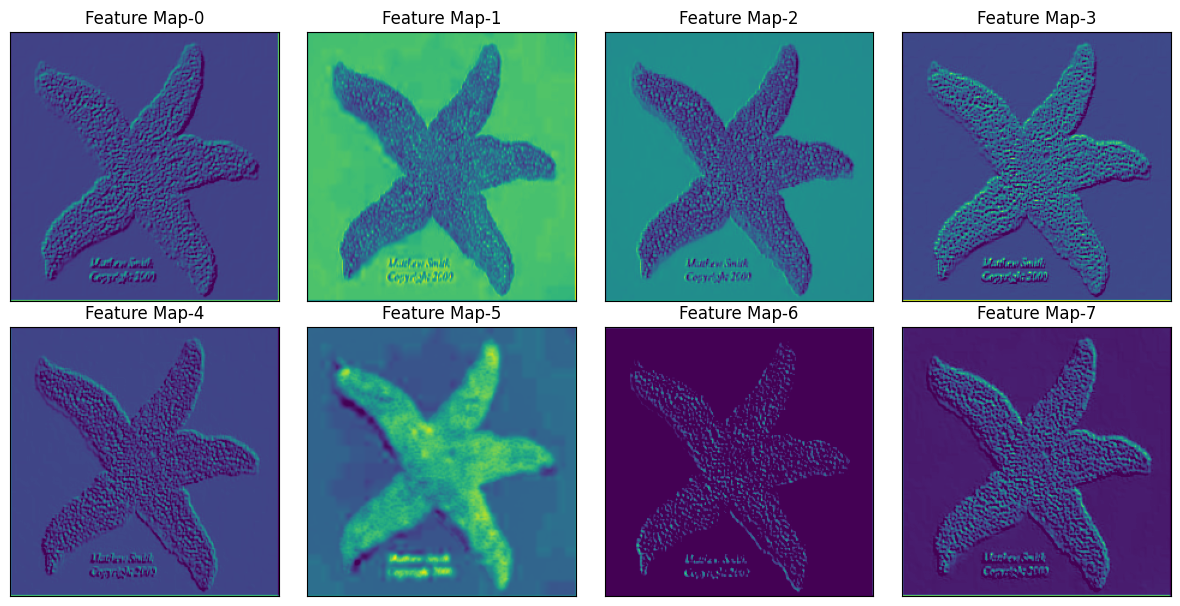

In [ ]:
plt.figure(figsize=(15,15))
for i in range(8):
    #displaying original image
    #clss=n
    #idx=np.where(Output_train==i)[0][0]
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv1FM[100][ :, :, i])
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#for i in range(8):
        #plt.imshow(conv1FM[0][ :, :, i])
plt.show()

In [ ]:
modelConv2 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block1_conv2').output)
conv2FM = modelConv2.predict(trainInp)
print(conv2FM.shape)

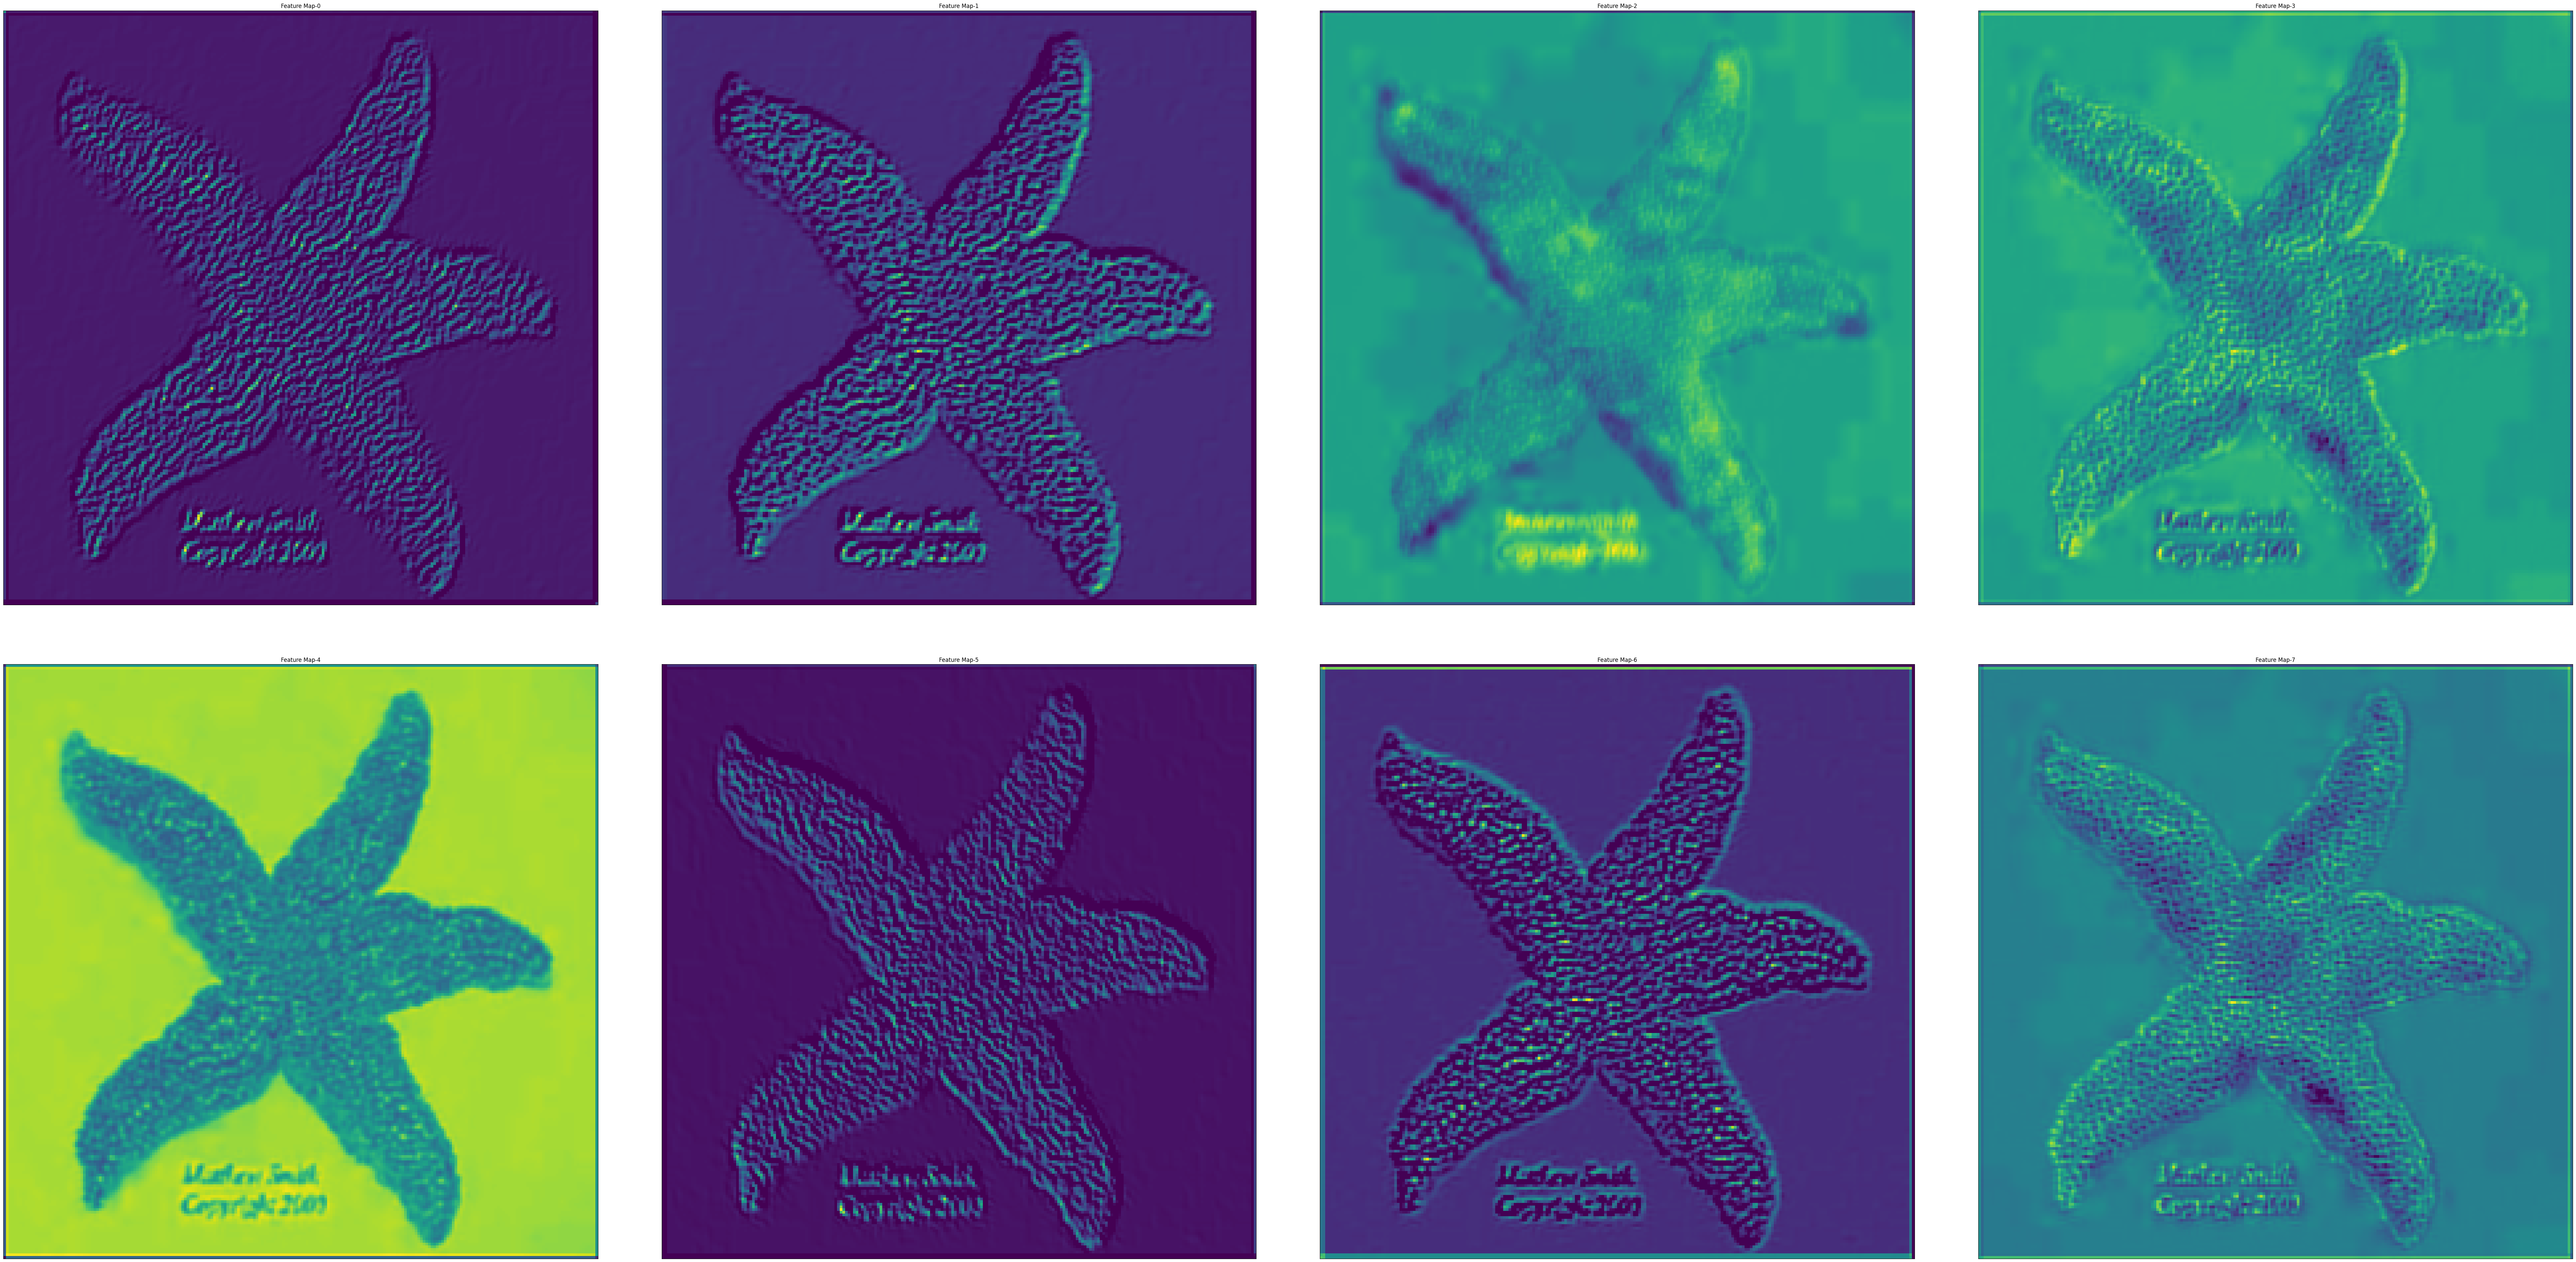

In [ ]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv2FM[100][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
modelConv3 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block2_conv1').output)
conv3FM = modelConv3.predict(trainInp)
print(conv3FM.shape)

8/8 [==============================] - 5s 535ms/step
(250, 112, 112, 128)


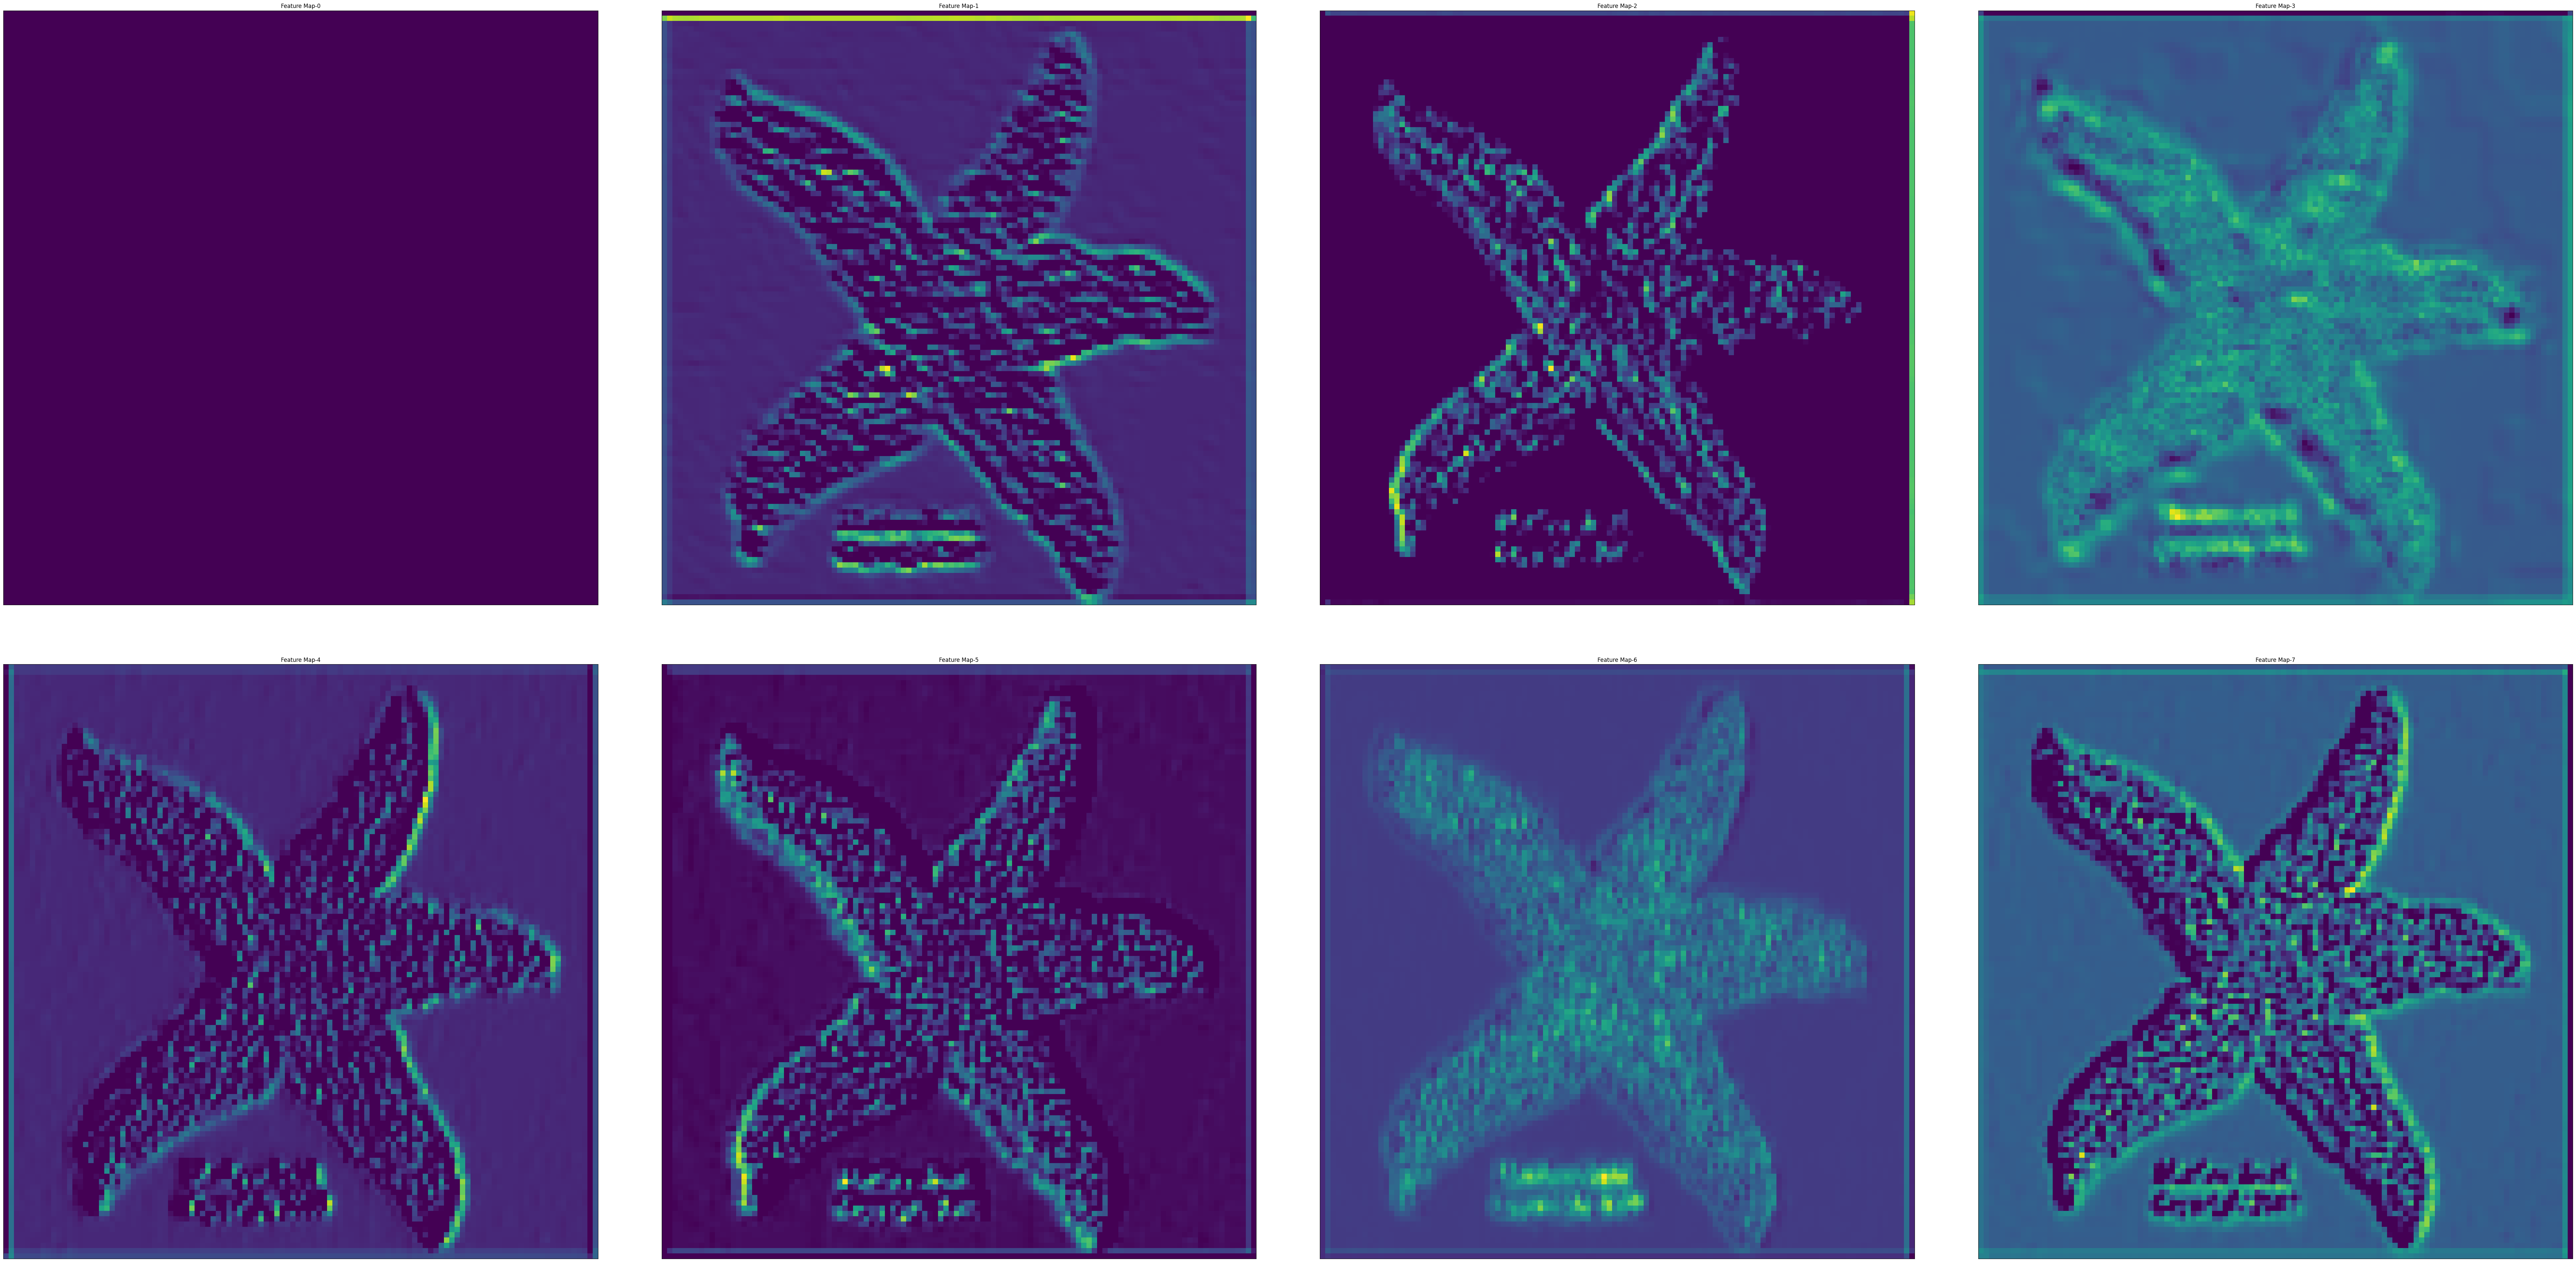

In [ ]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv3FM[100][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
modelConv4 = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block2_conv2').output)
conv4FM = modelConv4.predict(trainInp)
print(conv4FM.shape)

8/8 [==============================] - 6s 771ms/step
(250, 112, 112, 128)


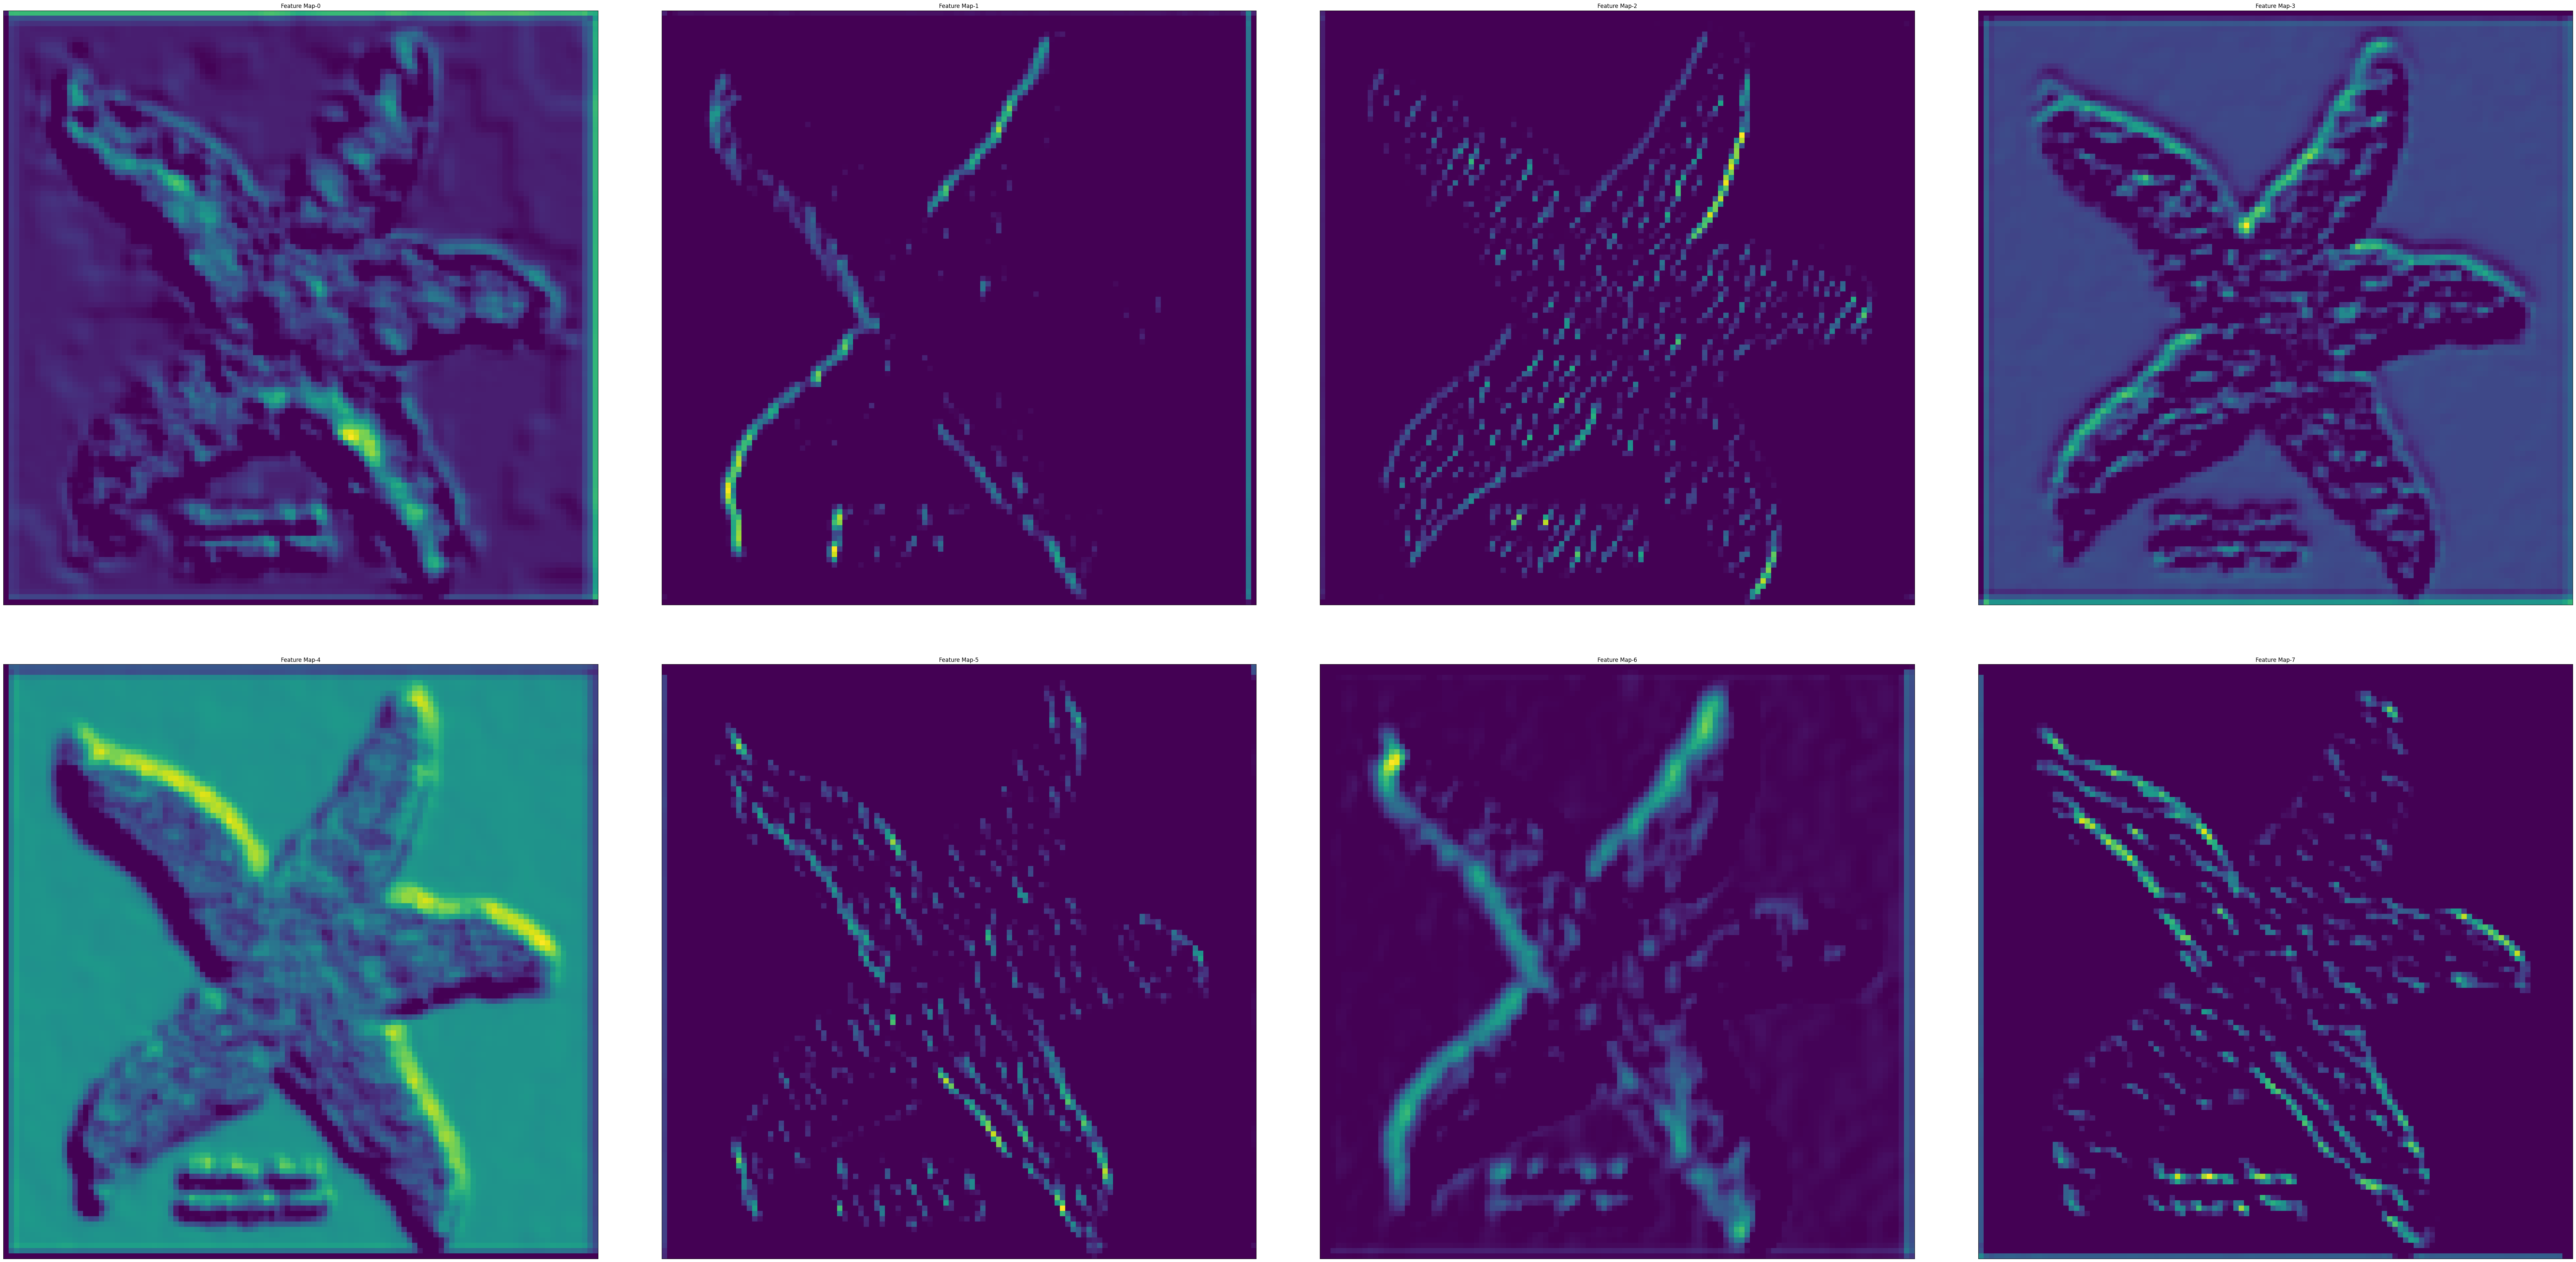

In [ ]:
plt.figure(figsize=(100,100))
for i in range(8):
    ax=plt.subplot(4,4,i+1)
    plt.title('Feature Map-'+str(i))
    plt.imshow(conv4FM[100][ :, :, i])
    #plt.subplots_adjust(wspace=None, hspace=None)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    #ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

vgg19=tf.keras.applications.vgg19.VGG19(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
vgg19.summary()

vgg=VGG19(include_top=False)

vgg=tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False) 
#Training with Imagenet weights
# Use this line for VGG19 network. Create a VGG19 model, and removing the last layer that is classifying 1000 images. This will be replaced with images classes we have. 
#vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# This sets the base that the layers are not trainable. If we'd want to train the layers with custom data, these two lines can be ommitted. 
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output) #Output obtained on vgg16 is now flattened. 
prediction = Dense(len(folders), activation='softmax')(x) # We have 5 classes, and so, the prediction is being done on len(folders) - 5 classes
#Creating model object 
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
